In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
#Loading data set
NFL_dataset = pd.read_csv("C:///Football_NN.csv")
NFL_dataset.head()

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
0,269,3,95,3397,2,1,2.0,15,4,1,0,0,0,0,1,0,0,0
1,486,6,99,3230,4,1,1.0,10,6,1,0,0,0,1,0,0,0,0
2,675,12,66,3099,6,1,1.0,10,6,0,0,0,0,0,1,0,0,0
3,697,13,60,3070,6,1,2.0,4,3,1,0,0,0,0,1,0,0,0
4,718,14,57,3030,6,1,3.0,1,0,1,0,0,0,0,1,0,0,0


In [6]:
#Exploratory Analysis on data
NFL_dataset.shape

(5298, 18)

In [44]:
NFL_dataset.loc[:,['qtr','drive']]

,qtr,drive
0,1,2
1,1,4
2,1,6
3,1,6
4,1,6
...,...,...
5293,4,18
5294,4,18
5295,4,18
5296,4,18


In [35]:
NFL_dataset.loc[NFL_dataset['qtr'] == 1,['play_id','PlayOfGame']]

,play_id,PlayOfGame
0,269,3
1,486,6
2,675,12
3,697,13
4,718,14
...,...,...
5267,124,5
5268,174,7
5269,243,10
5270,531,12


In [70]:
NFL_dataset.loc[NFL_dataset['qtr']==1,['qtr','game_seconds_remaining']]

,qtr,game_seconds_remaining
0,1,3397
1,1,3230
2,1,3099
3,1,3070
4,1,3030
...,...,...
5267,1,3485
5268,1,3423
5269,1,3312
5270,1,3119


In [40]:
NFL_dataset.iloc[:,1:100]

,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
0,3,95,3397,2,1,2.0,15,4,1,0,0,0,0,1,0,0,0
1,6,99,3230,4,1,1.0,10,6,1,0,0,0,1,0,0,0,0
2,12,66,3099,6,1,1.0,10,6,0,0,0,0,0,1,0,0,0
3,13,60,3070,6,1,2.0,4,3,1,0,0,0,0,1,0,0,0
4,14,57,3030,6,1,3.0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,67,17,280,18,4,1.0,10,9,1,0,0,1,0,0,0,1,7
5294,68,8,236,18,4,2.0,1,1,0,0,0,0,1,0,0,1,7
5295,70,7,229,18,4,1.0,7,1,1,0,0,1,0,0,0,0,7
5296,72,6,225,18,4,2.0,6,0,1,0,0,1,0,0,0,0,7


In [72]:
NFL_dataset.iloc[:,0]

0        269
1        486
2        675
3        697
4        718
        ... 
5293    3402
5294    3423
5295    3461
5296    3499
5297    3877
Name: play_id, Length: 5287, dtype: int64

In [35]:
#check for unique values in column game_seconds_remaining
NFL_dataset['yards_gained'].nunique()

72

In [57]:
NFL_dataset.groupby(['play_id','PlayOfGame']).ngroups

5018

In [36]:
NFL_dataset['yards_gained'].value_counts()

2     664
3     632
1     612
4     540
0     444
     ... 
88      1
49      1
45      1
59      1
63      1
Name: yards_gained, Length: 72, dtype: int64

In [27]:
NFL_dataset.loc[NFL_dataset['qtr'] == 5,:]

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
19,5032,96,75,600,28,5,1.0,10,7,1,0,0,0,0,1,0,0,0
20,5146,101,8,478,28,5,2.0,8,-2,1,0,0,0,1,0,1,0,0
21,5552,108,61,168,30,5,1.0,10,5,1,1,0,0,0,1,0,0,0
22,5664,112,49,113,30,5,1.0,10,3,1,1,0,0,0,1,0,0,0
910,4289,91,75,600,22,5,1.0,10,-1,1,0,0,0,1,0,0,0,0
911,4509,95,34,447,24,5,1.0,10,3,1,0,0,1,0,0,1,0,0
912,4530,96,31,414,24,5,2.0,7,2,1,0,0,0,1,0,0,1,0
913,4551,97,29,372,24,5,3.0,5,1,1,0,0,1,0,0,1,0,0
2874,5043,111,95,462,27,5,1.0,10,3,1,0,0,0,0,1,0,0,0
2875,5064,112,92,426,27,5,2.0,7,2,0,0,0,0,1,0,0,0,0


In [9]:
#Descriptive Statistics of the data
NFL_dataset.describe()

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
count,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5287.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000,5298.000000
mean,2056.890902,42.101170,50.127029,1810.239147,11.165157,2.503209,1.566106,8.175727,4.653265,0.511514,0.062665,0.065308,0.357871,0.372782,0.269347,0.234239,0.264628,0.322008
std,1256.606862,25.786316,25.140036,1049.120206,6.691572,1.132229,0.728929,3.839409,6.479226,0.499915,0.242383,0.247091,0.479419,0.483590,0.443662,0.423562,0.441177,10.995482
min,50.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39.000000
25%,920.000000,19.000000,31.000000,900.000000,5.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
50%,2060.000000,41.000000,53.000000,1800.000000,11.000000,3.000000,1.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3140.000000,63.000000,72.000000,2723.000000,17.000000,4.000000,2.000000,10.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.000000
max,5664.000000,117.000000,99.000000,3600.000000,31.000000,5.000000,4.000000,35.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000


In [76]:
# Analyse correlation between variables
from scipy.stats import stats
NFL_dataset1 = NFL_dataset.drop('yards_gained',axis=1)
corr=NFL_dataset1.corr()
corr

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
play_id,1.000000,0.973291,-0.054173,-0.987402,0.963747,0.963323,0.058331,-0.023724,-0.000447,0.004580,0.018883,0.000991,-0.024345,0.025521,-0.024691,0.026102,0.109250
PlayOfGame,0.973291,1.000000,-0.101804,-0.969040,0.943156,0.943611,0.075758,-0.036310,-0.000046,0.001370,0.020587,0.000622,-0.019766,0.020919,-0.022391,0.029350,0.144043
yardline_100,-0.054173,-0.101804,1.000000,0.068876,-0.012173,-0.048414,-0.109759,0.283086,-0.007355,-0.047831,-0.005551,0.005578,0.023375,-0.031575,-0.018286,0.014072,-0.024168
game_seconds_remaining,-0.987402,-0.969040,0.068876,1.000000,-0.947982,-0.967146,-0.066003,0.031090,0.001983,-0.000658,-0.017925,0.001741,0.022459,-0.026420,0.025720,-0.026173,-0.112117
drive,0.963747,0.943156,-0.012173,-0.947982,1.000000,0.925907,0.044631,-0.010022,-0.021112,-0.012975,0.010112,0.003215,-0.024910,0.023730,-0.019301,0.022348,0.107889
qtr,0.963323,0.943611,-0.048414,-0.967146,0.925907,1.000000,0.050481,-0.026716,-0.009320,0.003723,0.003635,0.000904,-0.016948,0.017535,-0.025923,0.027824,0.101345
down,0.058331,0.075758,-0.109759,-0.066003,0.044631,0.050481,1.000000,-0.506876,0.093376,0.020381,0.171174,-0.016956,-0.035973,0.057661,-0.002778,-0.009806,-0.019054
ydstogo,-0.023724,-0.036310,0.283086,0.031090,-0.010022,-0.026716,-0.506876,1.000000,0.084952,-0.061354,0.046053,0.017175,0.026614,-0.047674,0.046416,-0.038449,0.017397
shotgun,-0.000447,-0.000046,-0.007355,0.001983,-0.021112,-0.009320,0.093376,0.084952,1.000000,0.066798,0.175424,-0.027495,-0.037032,0.070233,-0.044739,0.021744,-0.007549
no_huddle,0.004580,0.001370,-0.047831,-0.000658,-0.012975,0.003723,0.020381,-0.061354,0.066798,1.000000,0.051302,-0.006601,-0.041939,0.052963,0.027724,-0.047758,-0.075564


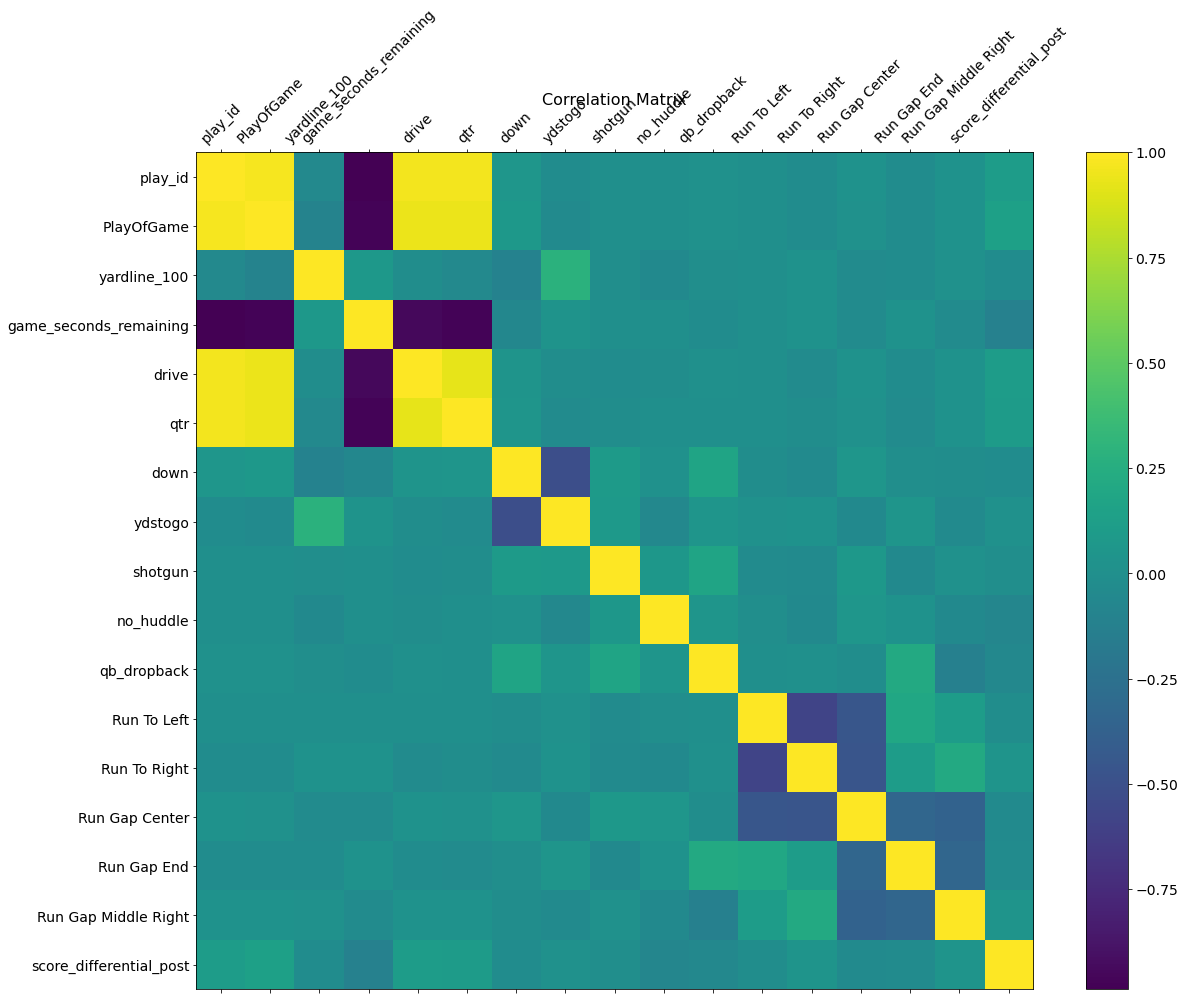

In [77]:
#Correlation matrix to identify the correlation between variables
#We can see that variables like yardline_100 ,qp_dropback,run to left,ydstogo have highg correlation
df= NFL_dataset1

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

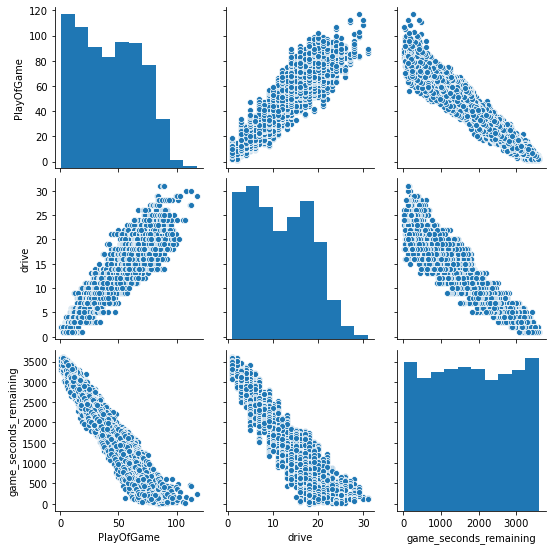

In [72]:
#scatter plot to show the positive and negative correlation between variables
sns.pairplot(NFL_dataset[['PlayOfGame','drive','game_seconds_remaining']])

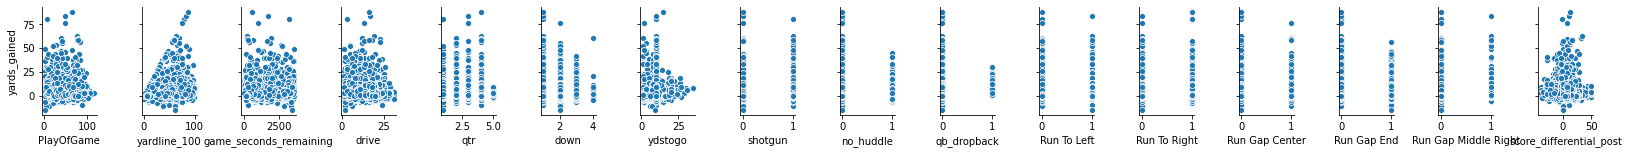

In [45]:
sns.pairplot(NFL_dataset, x_vars=['PlayOfGame','yardline_100','game_seconds_remaining','drive','qtr','down','ydstogo','shotgun','no_huddle','qb_dropback','Run To Left','Run To Right','Run Gap Center','Run Gap End','Run Gap Middle Right','score_differential_post'], y_vars='yards_gained', size=2, aspect=0.7)

In [78]:

#X = NFL_dataset[['PlayOfGame','yardline_100','game_seconds_remaining','drive','qtr','down','ydstogo','shotgun','no_huddle','qb_dropback','Run To Left','Run To Right','Run Gap Center','Run Gap End','Run Gap Middle Right','score_differential_post']]
#X = NFL_dataset[['PlayOfGame','drive','qtr','game_seconds_remaining']]
#y = NFL_dataset[['yards_gained']]




In [11]:
NFL_dataset['down'].value_counts()

1.0    2971
2.0    1717
3.0     521
4.0      78
Name: down, dtype: int64

In [12]:
#Clean data since down has 11 missing values 
NFL_dataset.isnull().sum()

play_id                     0
PlayOfGame                  0
yardline_100                0
game_seconds_remaining      0
drive                       0
qtr                         0
down                       11
ydstogo                     0
yards_gained                0
shotgun                     0
no_huddle                   0
qb_dropback                 0
Run To Left                 0
Run To Right                0
Run Gap Center              0
Run Gap End                 0
Run Gap Middle Right        0
score_differential_post     0
dtype: int64

In [135]:
#Impute missing values by dropping NAN rows
NFL_dataset.dropna(inplace = True)

In [136]:
NFL_dataset.isnull().sum()

play_id                    0
PlayOfGame                 0
yardline_100               0
game_seconds_remaining     0
drive                      0
qtr                        0
down                       0
ydstogo                    0
yards_gained               0
shotgun                    0
no_huddle                  0
qb_dropback                0
Run To Left                0
Run To Right               0
Run Gap Center             0
Run Gap End                0
Run Gap Middle Right       0
score_differential_post    0
dtype: int64

In [4]:
len(NFL_dataset)

5298

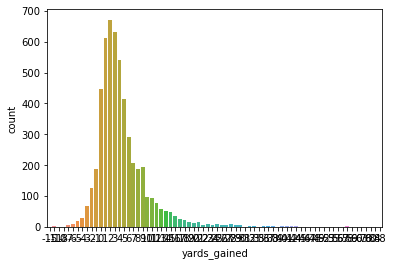

In [11]:
sns.countplot(x= 'yards_gained',data = NFL_dataset,saturation=0.9)

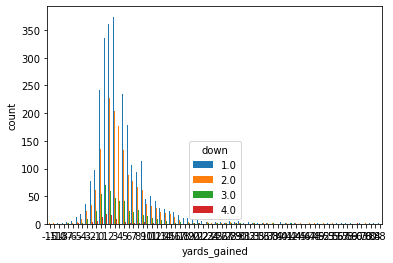

In [19]:
sns.countplot(x='yards_gained',hue = 'down',data =NFL_dataset,saturation=1)

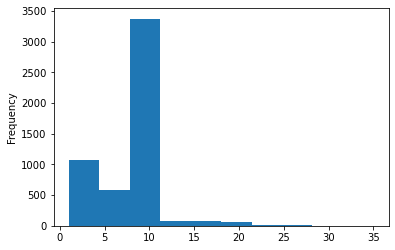

In [73]:
NFL_dataset['ydstogo'].plot.hist()

In [107]:
NFL_dataset['yards_gained'] = abs(NFL_dataset['yards_gained'])

Feature: 0, Score: 4.60027
Feature: 1, Score: 10.38362
Feature: 2, Score: 15.51827
Feature: 3, Score: 0.15844
Feature: 4, Score: 0.00345
Feature: 5, Score: 0.02520
Feature: 6, Score: 0.22107
Feature: 7, Score: 0.03979
Feature: 8, Score: -0.00790
Feature: 9, Score: -0.00396
Feature: 10, Score: 0.01167
Feature: 11, Score: -0.01800
Feature: 12, Score: 0.00423
Feature: 13, Score: 0.01562
Feature: 14, Score: 0.01202
Feature: 15, Score: 3.96394


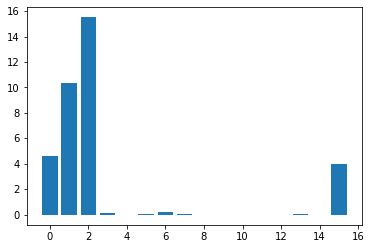

In [216]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X = NFL_dataset[['PlayOfGame','yardline_100','game_seconds_remaining','drive','qtr','down','ydstogo','shotgun','no_huddle','qb_dropback','Run To Left','Run To Right','Run Gap Center','Run Gap End','Run Gap Middle Right','score_differential_post']]
y = NFL_dataset[['yards_gained']]
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [208]:
NFL_dataset['yards_gained'] = NFL_dataset['yards_gained'].abs()


In [209]:
#Select all the variables with higher feature importance co-efficient values
#Test train split 
#X = NFL_dataset[['qb_dropback','Run Gap End','shotgun','Run To Left']]
X = NFL_dataset[['PlayOfGame','yardline_100','game_seconds_remaining','score_differential_post']]

y = NFL_dataset[['yards_gained']]


In [4]:
#Finding value of n_neighbors
import math
math.sqrt(len(y_test))

32.55764119219941

In [210]:
#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [211]:
# KNN model prediction and Evaluation of the model
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
square_error =[]
absolute_error =[]

for k in [1,2,5,10]:
    neigh_reg = KNeighborsRegressor(n_neighbors=k)

    neigh_reg.fit(X_train,y_train)
    y_predict = neigh_reg.predict(X_test)
    error1 = sqrt(mean_squared_error(y_test,y_predict))
    error2 = mean_absolute_error(y_test,y_predict)
    square_error.append(error1)
    absolute_error.append(error2)
    
    print("Root mean squared error for k= {0} is  : {1}".format(k,error1))
    print("Mean absolute error for k = {0} is : {1}".format(k,error2))


Root mean squared error for k= 1 is  : 9.210261803840003
Mean absolute error for k = 1 is : 5.118147448015123
Root mean squared error for k= 2 is  : 7.801486092738902
Mean absolute error for k = 2 is : 4.51937618147448
Root mean squared error for k= 5 is  : 7.359879488616408
Mean absolute error for k = 5 is : 4.298109640831758
Root mean squared error for k= 10 is  : 7.070964217958157
Mean absolute error for k = 10 is : 4.151890359168242


In [213]:
y_predict[1:10]


array([[2.7],
       [3.4],
       [6.5],
       [3.6],
       [3.8],
       [4.9],
       [5.4],
       [4.1],
       [4.9]])

In [191]:
y_test[1:10]

,yards_gained
521,1
608,3
4104,4
4693,5
3792,2
42,1
1708,1
4496,4
4619,3
